In [1]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 43.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pulp
from math import radians, sin, cos, sqrt, atan2
import folium
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Foundations_of_data_Science/MyData.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [5]:
# Step 1: Load Pollution Data
pollution_data = pd.read_csv('/content/dataset/MyData.csv')


In [6]:
import pandas as pd

# Convert timestamp to datetime
pollution_data['Datetime'] = pd.to_datetime(pollution_data['time'], unit='s')

# Extract month, day, and hour
pollution_data['Month'] = pollution_data['Datetime'].dt.month
pollution_data['MonthDate'] = pollution_data['Datetime'].dt.day  # Extract day of the month
pollution_data['Day'] = pollution_data['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
pollution_data['Hour'] = pollution_data['Datetime'].dt.hour

# Check the first few rows to verify the changes
print(pollution_data.head())


      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4    12  
1 2021-09-10 12:35:08 

In [7]:
# Define the order of months and days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


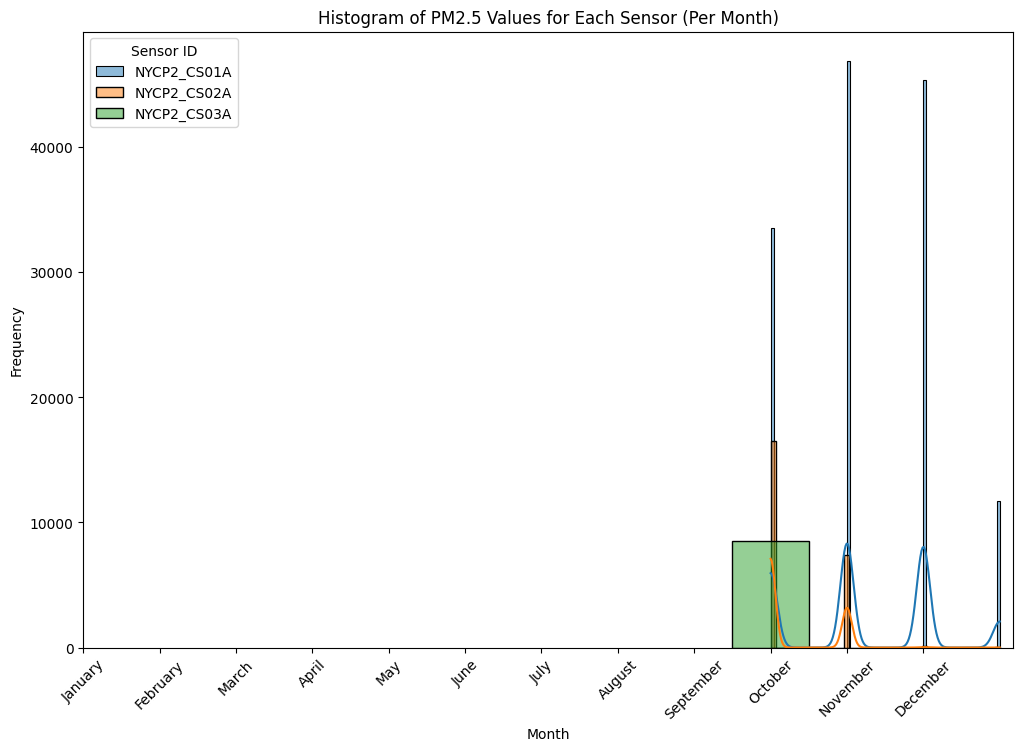

In [8]:
# Plot histograms of PM2.5 values for each sensor per month
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Month', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Month)')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ticks=range(12), labels=month_order)
plt.legend(title='Sensor ID')
plt.show()

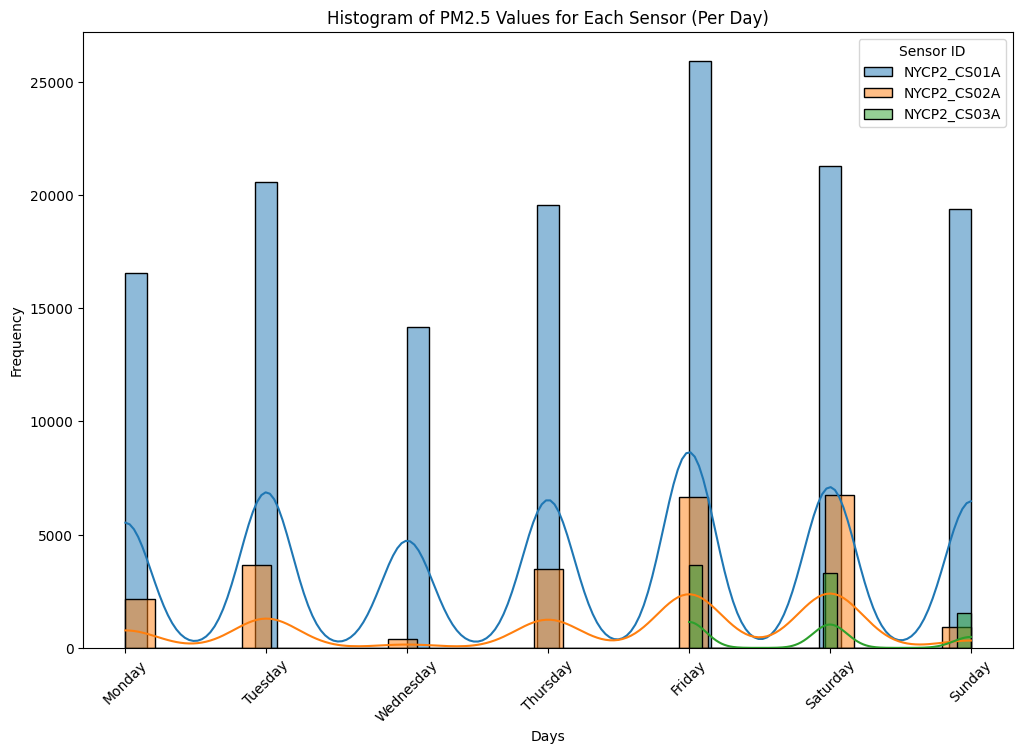

In [9]:
# Plot histograms of PM2.5 values for each sensor per day
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Day', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Day)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ticks=range(7), labels=day_order)
plt.legend(title='Sensor ID')
plt.show()

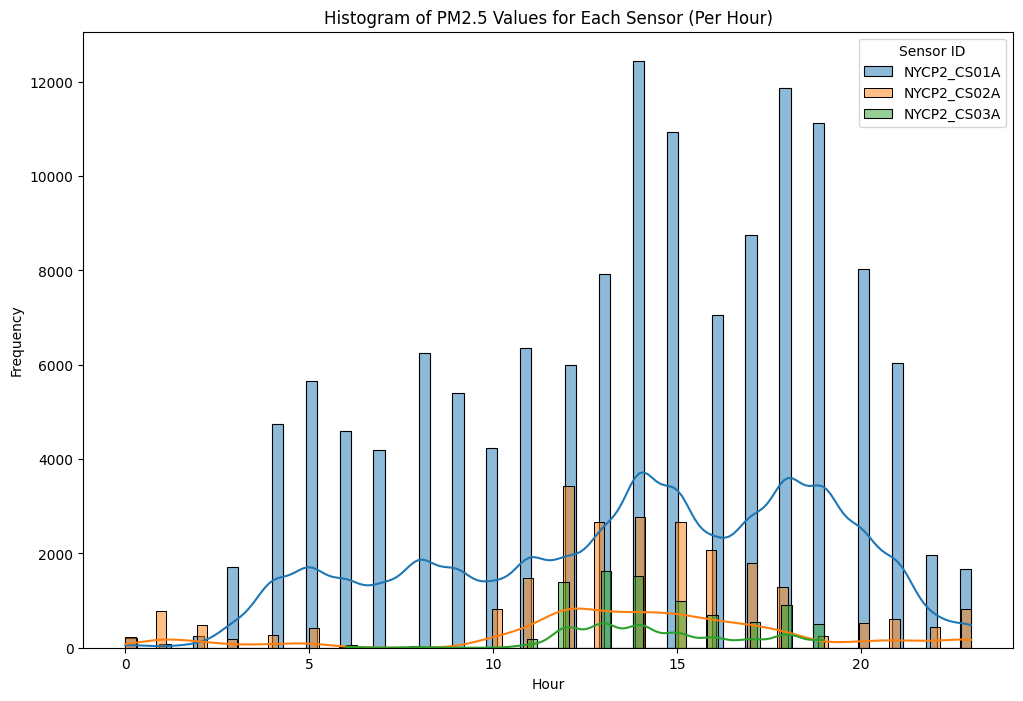

In [10]:

# Plot histograms of PM2.5 values for each sensor per hour
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Hour', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Hour)')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(title='Sensor ID')
plt.show()

In [11]:
# Define filtering criteria
selected_months = [1,2,3,4,5,6,7,8,10]
selected_days = [0,1,2,3,4, 5, 6]  # Friday, Saturday, Sunday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())



Original Filtered Dataset:
          SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
33500  NYCP2_CS01A  1633058579  40.845501 -73.870621     7     0     1     0   
33501  NYCP2_CS01A  1633058580  40.845501 -73.870621     5     0     1     0   
33502  NYCP2_CS01A  1633058585  40.845501 -73.870621    25     4     0     1   
33503  NYCP2_CS01A  1633058590  40.845501 -73.870621    23     1     0     0   
33504  NYCP2_CS01A  1633058595  40.845379 -73.870483    29     1     0     0   

       bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
33500     0     0  ...      0      0         12.7      71.8  2.532905   
33501     0     0  ...      0      0         12.7      71.7  2.532905   
33502     0     0  ...      0      0         12.7      71.5  2.532905   
33503     0     0  ...      0      0         12.7      71.3  2.532905   
33504     0     1  ...      0      0         12.7      71.2  4.180301   

                 Datetime  Month  MonthDate  Day  Ho

In [12]:
# Define filtering criteria
selected_months = [11,12]
selected_days = [0,1,2,3,4, 5, 6]  # Friday, Saturday, Sunday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())



Original Filtered Dataset:
          SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
80376  NYCP2_CS01A  1635750805  40.845959 -73.870377    12     0     1     0   
80377  NYCP2_CS01A  1635750811  40.845959 -73.870377    23     2     1     0   
80378  NYCP2_CS01A  1635750816  40.845856 -73.870224    23     1     0     0   
80379  NYCP2_CS01A  1635750821  40.845863 -73.870270    27     0     0     0   
80380  NYCP2_CS01A  1635750826  40.845898 -73.870308    25     1     1     0   

       bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
80376     0     0  ...      0      0         11.2      90.1  3.624330   
80377     0     0  ...      0      0         11.3      90.1  3.624330   
80378     0     1  ...      0      0         11.3      89.9  4.145529   
80379     0     0  ...      0      0         11.3      89.8  3.624330   
80380     0     0  ...      0      0         11.3      89.5  3.624330   

                 Datetime  Month  MonthDate  Day  Ho

In [13]:
# Define filtering criteria
selected_months = [9,10, 11, 12]
selected_days = [4, 5, 6]  # Friday, Saturday, Sunday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())



Original Filtered Dataset:
      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4   

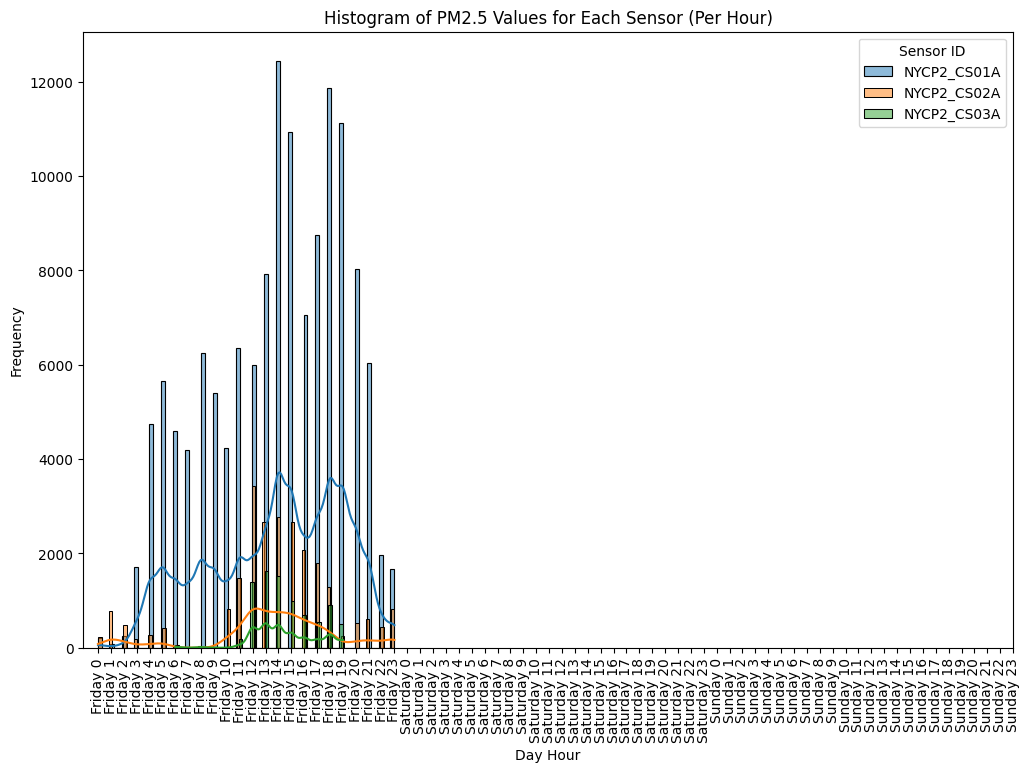

In [14]:
# Define the mapping of day numbers to day names
day_names = ['Friday']

# Plot histograms of PM2.5 values for each sensor per hour
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Hour', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Hour)')
plt.xlabel('Day Hour')
plt.ylabel('Frequency')
plt.legend(title='Sensor ID')

# Set X-axis labels to combined day and hour labels
hour_labels = [f"{day_names[day]} {hour}" for day in range(3) for hour in range(24)]
plt.xticks(range(3 * 24), labels=hour_labels, rotation=90)

plt.show()


In [15]:
# Define filtering criteria
selected_months = [9]
selected_days = [4]  # Friday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())


Original Filtered Dataset:
      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4   

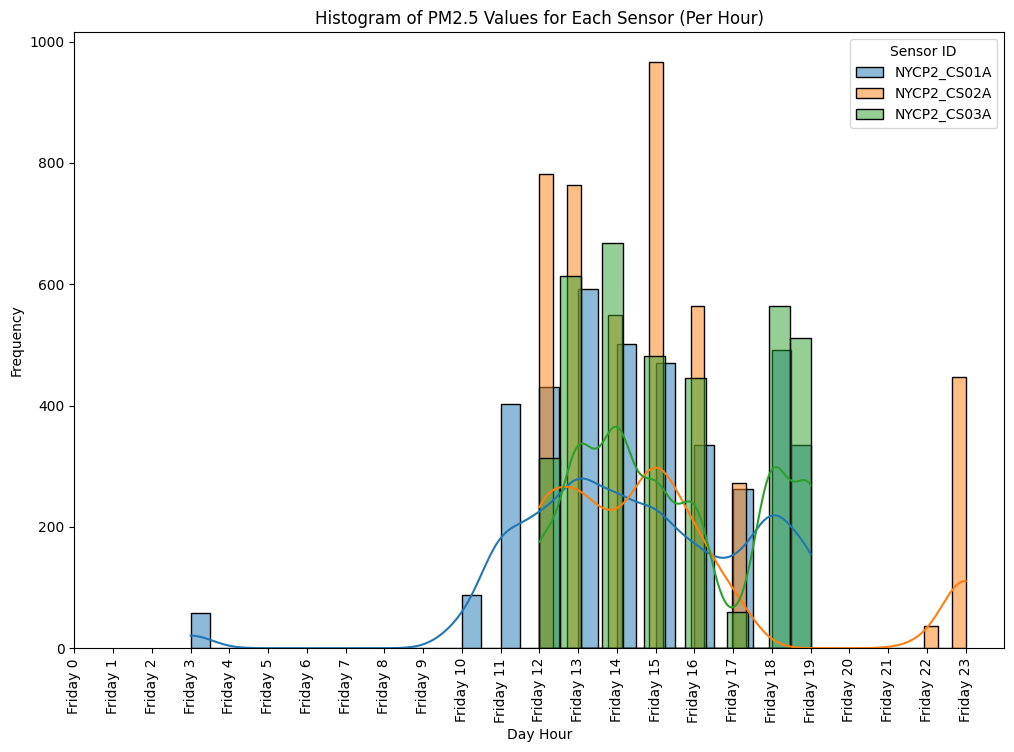

In [16]:
# Plot histograms of PM2.5 values for each sensor per hour
plt.figure(figsize=(12, 8))
for sensor_id in original_filtered_data['SensorID'].unique():
    sns.histplot(data=original_filtered_data[original_filtered_data['SensorID'] == sensor_id], x='Hour', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Hour)')
plt.xlabel('Day Hour')
plt.ylabel('Frequency')
plt.legend(title='Sensor ID')

# Set X-axis labels to combined day and hour labels
hour_labels = [f"{day_names[day]} {hour}" for day in range(1) for hour in range(24)]
plt.xticks(range(1 * 24), labels=hour_labels, rotation=90)

plt.show()

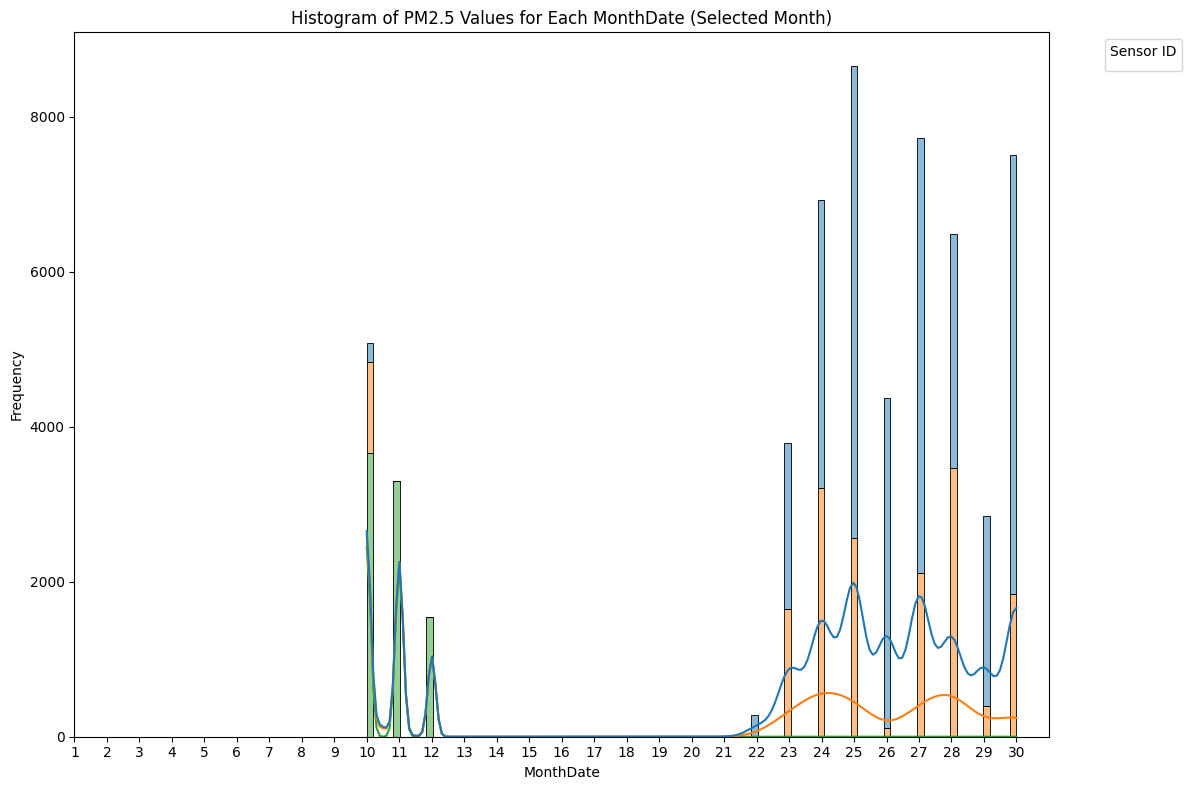

In [17]:
# Define filtering criteria
selected_months = [9]  # Example months (September, October, November, December)
days_in_month = range(1, 31)  # Days from 1 to 30

# Filter the dataset for the selected months and days
filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['MonthDate'].isin(days_in_month))]

# Group data by MonthDate and count the number of records for each date
data_counts = filtered_data.groupby('MonthDate').size()

# Plot histograms of PM2.5 values for each MonthDate
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x='MonthDate', hue='SensorID', multiple='stack', kde=True)
plt.title('Histogram of PM2.5 Values for Each MonthDate (Selected Month)')
plt.xlabel('MonthDate')
plt.ylabel('Frequency')
plt.xticks(range(1, 31))  # Set x-axis ticks to represent days
plt.legend(title='Sensor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:

# Define filtering criteria
selected_months = [9]
selected_date = [10]

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['MonthDate'].isin(selected_date))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())


Original Filtered Dataset:
      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4   

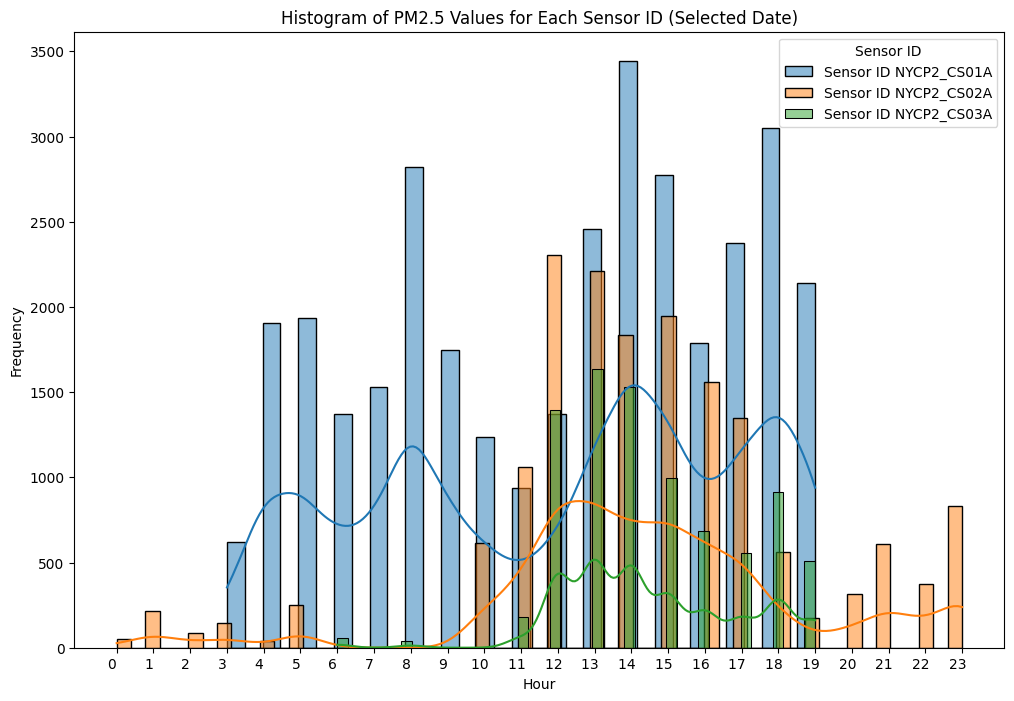

In [19]:
# Plot histograms of PM2.5 values for each sensor ID
plt.figure(figsize=(12, 8))
for sensor_id in filtered_data['SensorID'].unique():
    sns.histplot(data=filtered_data[filtered_data['SensorID'] == sensor_id], x='Hour', kde=True, label=f'Sensor ID {sensor_id}')
plt.title('Histogram of PM2.5 Values for Each Sensor ID (Selected Date)')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(24), labels=[f"{hour}  " for hour in range(24)])  # Set x-axis ticks to represent hours
plt.legend(title='Sensor ID')
plt.show()

In [20]:
import zipfile
import os
# Define the file path
csv_file = "/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData.csv"

# Save the dataset to CSV format
filtered_data.to_csv(csv_file)

# Define the path for the zip file
zip_file_path = "/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData.zip"

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w') as zip_ref:
    # Add the CSV file to the zip archive
    zip_ref.write(csv_file, os.path.basename(csv_file))

print("File uploaded and zipped successfully.")


File uploaded and zipped successfully.


[pulp](https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html)

In [21]:
import pandas as pd
import pulp
from math import radians, sin, cos, sqrt, atan2

def distance(lat1, lon1, lat2, lon2):
    # Calculate the distance between two points using Haversine formula
    R = 6371.0  # Radius of the Earth in kilometers
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
problem =None
def minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold):
    # Specify the columns
    columns_to_keep = ['SensorID', 'time', 'latitude', 'longitude', 'temperature', 'humidity', 'pm25']

    # Read the CSV file and select only the specified columns
    data = pd.read_csv(csv_file, usecols=columns_to_keep)


    # Initialize the ILP problem
    problem = pulp.LpProblem("MinimumCostDeployment", pulp.LpMinimize)

    # Decision variables
    num_sites = len(data)
    sensors = pulp.LpVariable.dicts("Sensor", range(num_sites), cat=pulp.LpBinary)

    # Objective function: minimize cost
    problem += pulp.lpSum([sensors[i] for i in range(num_sites)])

    # Constraints: pollution coverage
    for i in range(num_sites):
        problem += pulp.lpSum([sensors[j] for j in range(num_sites) if distance(data['latitude'][i], data['longitude'][i], data['latitude'][j], data['longitude'][j]) <= coverage_threshold]) >= 1

    # Constraint: budget constraint
    problem += pulp.lpSum([sensors[i] for i in range(num_sites)]) <= budget

    # Solve the problem
    problem.solve()
    # The status of the solution is printed to the screen
    print("Status:", LpStatus[problem.status])
    # Extract solution
    solution = []
    for i in range(num_sites):
        if sensors[i].varValue == 1:
            solution.append(i)

    return solution



In [22]:
import gdown
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [23]:
from pulp import *
!pip install pulp
import pulp

In [ ]:

# Example usage:
csv_file = "/content/dataset/Sep10PerHrData.csv"  # Replace with the path to your CSV file
budget = 10  # Example budget
coverage_threshold = 0.8  # Example coverage threshold in kilometers
connectivity_threshold = 10  # Example connectivity threshold in kilometers
# Call the function
solution = minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold)
print("Optimal sensor deployment:", solution)